<a href="https://colab.research.google.com/github/Maxibrionest/FMY-Fundamentos-Machine-Learning/blob/main/Actividad_2_5_2/2_5_2_arbol_de_Decision_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este ejercicio generaremos un árbol de decisión que a través de Regresión, nos permita predecir si una persona sufrirá diabetes o no

## DataSet: Pacientes Enfermos con Diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: age in years
* sex
* bmi: body mass index
* bp: average blood pressure
* s1: T-Cells (a type of white blood cells)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: thyroid stimulating hormone
* s5: lamotrigine
* s6: blood sugar level

Objetivo: medida cuantitativa de la progresión de la enfermedad.


## Antes de modelar

### Cargamos y preparamos el dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
datos = load_diabetes()

X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

In [2]:
X.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [3]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Modelamiento (primeros pasos)

Usando la librería SKLEARN, generaremos un árbol de decisión para regresión

**INDICA QUE SIGNIFICAN CADA UNA DE LAS VARIABLES SIGUIENTES Y QUE INDICAN LAS MEDIDAS DE VERIFICACION USADAS.**

In [4]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(X, Y)

Yhat = mo2.predict(X)

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Y, Yhat)
mae = mean_absolute_error(Y, Yhat)
R2 = r2_score(Y, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  0.0
MAE:  0.0
R^2:  1.0


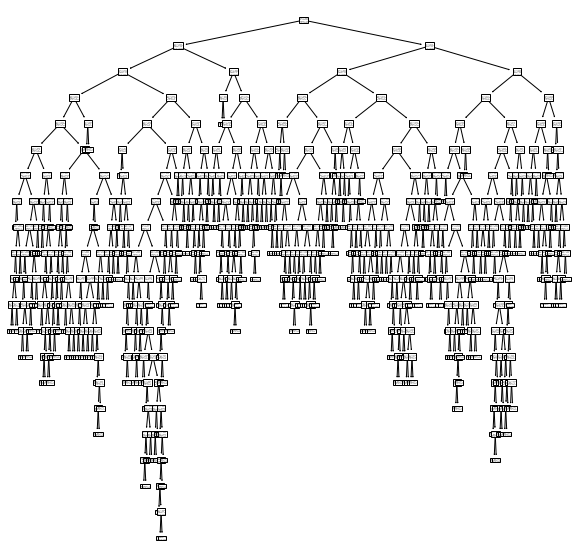

In [6]:
# Visualizamos el árbol generado!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(10,10))
_= tree.plot_tree(mo2) 

## Evitando el Overfitting

**INDICA : ¿por qué existe OVERFITTING?**

 - Porque aún se están utilizando las observaciones sin un subconjunto de CV ni de train.

In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeRegressor

mo2 = DecisionTreeRegressor()
mo2.fit(Xtrain, Ytrain)

Yhat = mo2.predict(Xtest)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(Ytest, Yhat)
mae = mean_absolute_error(Ytest, Yhat)
R2 = r2_score(Ytest, Yhat)

print("MSE: ",mse)
print("MAE: ",mae)
print("R^2: ",R2)

MSE:  7620.134831460674
MAE:  69.91011235955057
R^2:  -0.08000793162938313


In [14]:
1 - sum((Ytest - Yhat)**2)/sum((Ytest - Ytest.mean())**2)
#sum((Yhat - Ytest.mean())**2)/sum((Ytest - Ytest.mean())**2)

-0.08000793162938313

In [15]:
mo2.feature_importances_

array([0.05867576, 0.01693052, 0.23426003, 0.09253674, 0.04998515,
       0.07687322, 0.03739035, 0.01439113, 0.38426537, 0.03469173])

In [16]:
Xtrain.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

## Sintonización del modelo

**INDICA :** 

¿cómo se realiza esta sintonización?

 - Se detalla el modelo a utilizar y su regresor. Se especifican los hiperparámetros. Después utilizando GridSearchCV se determina, dentro de los indicado, el mejor modelo y la cantidad óptima de splits.


¿qué hiperparámetros se están modificando?

 - depth, sample_splits, cv

¿qué ocurre si ingresas otros valores?....prueba

 - guki



In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

In [26]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()
params = {"max_depth": np.arange(3, 10),          # [3,4,5]
          "min_samples_split": np.arange(2, 10)}  # [2,3,4]
grid = GridSearchCV(estimator=model, param_grid=params,cv=10)
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
      

In [29]:
print(grid.best_score_)
print(grid.best_params_)

0.3056776293350064
{'max_depth': 4, 'min_samples_split': 7}


In [30]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002127,0.000957,0.001173,0.000405,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
1,0.001736,0.000101,0.000991,0.000057,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
2,0.001737,0.000054,0.000991,0.000025,3,4,"{'max_depth': 3, 'min_samples_split': 4}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
3,0.001840,0.000105,0.001085,0.000133,3,5,"{'max_depth': 3, 'min_samples_split': 5}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
4,0.001734,0.000037,0.000988,0.000013,3,6,"{'max_depth': 3, 'min_samples_split': 6}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
5,0.001758,0.000042,0.001017,0.000030,3,7,"{'max_depth': 3, 'min_samples_split': 7}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
6,0.001898,0.000114,0.001049,0.000031,3,8,"{'max_depth': 3, 'min_samples_split': 8}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
7,0.002032,0.000252,0.001210,0.000155,3,9,"{'max_depth': 3, 'min_samples_split': 9}",0.219062,0.377904,0.531481,0.205714,0.117628,-0.054809,0.150722,0.230524,0.279060,0.441188,0.249847,0.160179,9
8,0.002188,0.000354,0.001163,0.000154,4,2,"{'max_depth': 4, 'min_samples_split': 2}",0.207456,0.453830,0.416479,0.248331,0.203375,0.080805,0.192802,0.196443,0.382938,0.445162,0.282762,0.123711,7
9,0.002162,0.000118,0.001170,0.000149,4,3,"{'max_depth': 4, 'min_samples_split': 3}",0.207456,0.453830,0.416817,0.248331,0.203375,0.188979,0.192802,0.196443,0.366582,0.445162,0.291978,0.108297,5


**Usar otra función de scoring/loss para elegir el "mejor" modelo**

**INVESTIGA** COMO SE USAN ESTAS FUNCIONES



*   Funciones pre-definidas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

*   Funciones personalizadas: 
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring

In [31]:
grid = GridSearchCV(estimator=model, param_grid=params,cv=10, scoring='r2')
grid.fit(Xtrain, Ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
      

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.3066955820382444
{'max_depth': 4, 'min_samples_split': 9}


In [33]:
#pd.DataFrame(grid.cv_results_).head()
pd.DataFrame(grid.cv_results_).iloc[grid.best_index_]

mean_fit_time                                            0.00193782
std_fit_time                                            6.79663e-05
mean_score_time                                         0.000921726
std_score_time                                          0.000108315
param_max_depth                                                   4
param_min_samples_split                                           9
params                     {'max_depth': 4, 'min_samples_split': 9}
split0_test_score                                          0.207456
split1_test_score                                           0.45383
split2_test_score                                          0.549292
split3_test_score                                          0.248331
split4_test_score                                          0.203375
split5_test_score                                          0.188979
split6_test_score                                          0.192802
split7_test_score                               

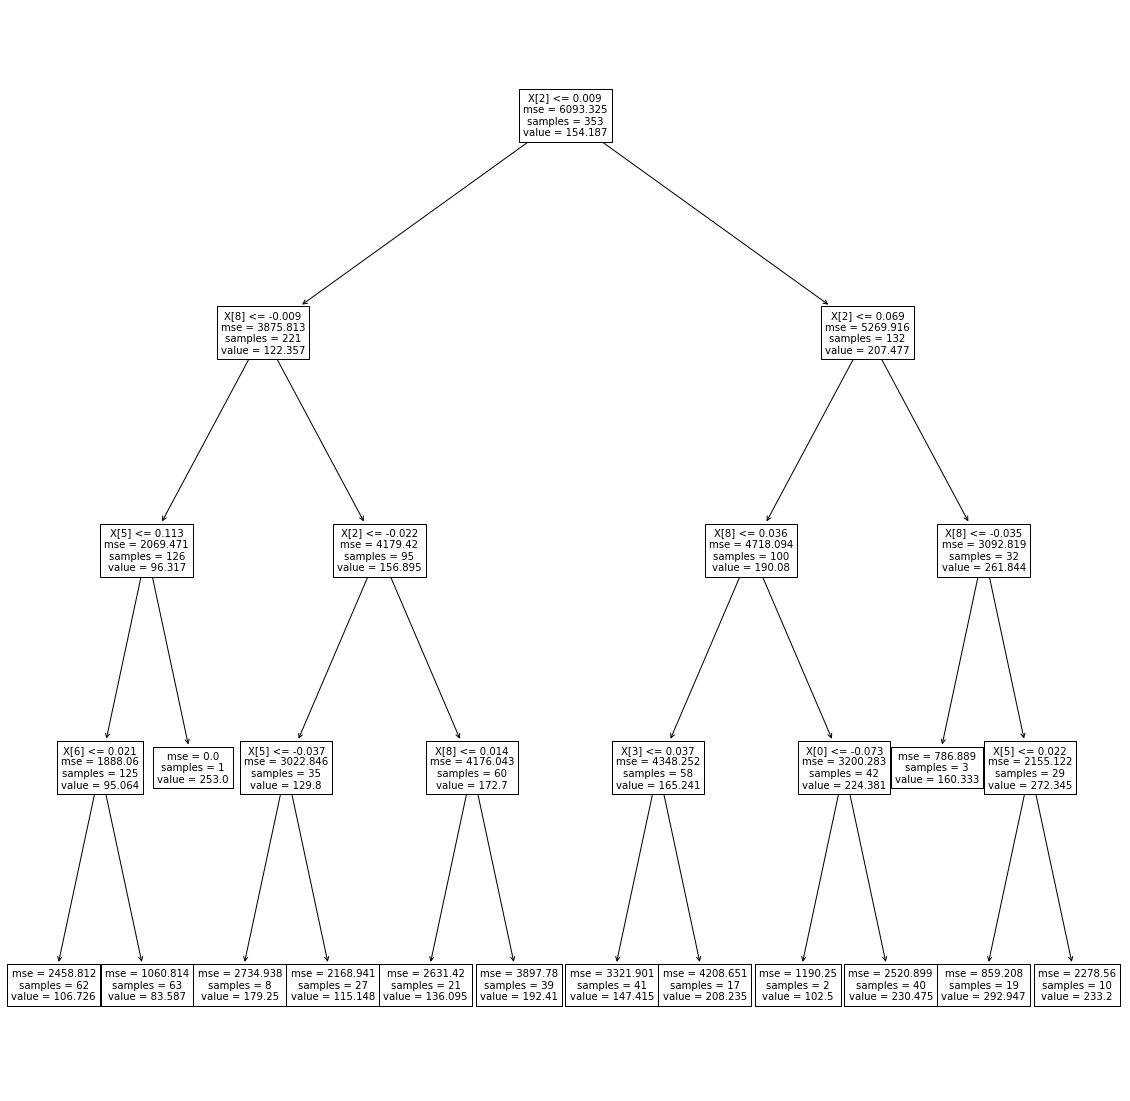

In [38]:
# Visualizamos el árbol ganador!

import matplotlib.pyplot as plt
from sklearn import tree
plt.subplots(1,1,figsize=(20,20))
_= tree.plot_tree(grid.best_estimator_) 

### Graficamos los resultamos estimados

3241.001090808242
45.286513484334904
0.3765594618945054


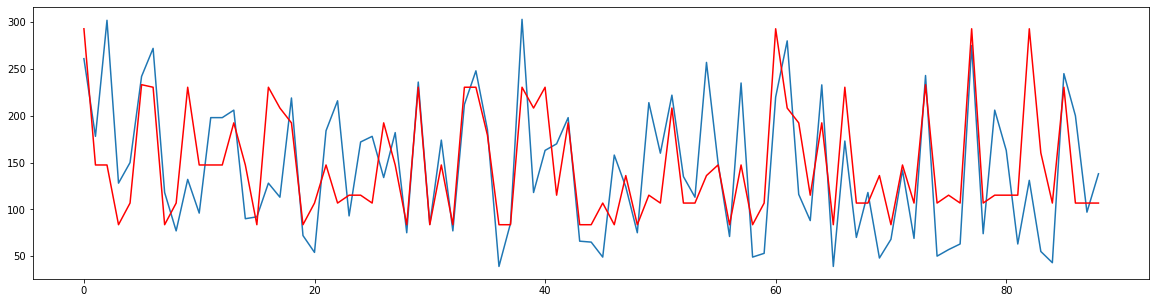

In [35]:
Yhat = grid.predict(Xtest)

print(mean_squared_error(Ytest, Yhat))
print(mean_absolute_error(Ytest, Yhat))
print(r2_score(Ytest, Yhat))

import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Yhat, 'r')

In [36]:
np.unique(Yhat)

array([ 83.58730159, 106.72580645, 115.14814815, 136.0952381 ,
       147.41463415, 160.33333333, 179.25      , 192.41025641,
       208.23529412, 230.475     , 233.2       , 292.94736842])

In [37]:
Yhat

array([292.94736842, 147.41463415, 147.41463415,  83.58730159,
       106.72580645, 233.2       , 230.475     ,  83.58730159,
       106.72580645, 230.475     , 147.41463415, 147.41463415,
       147.41463415, 192.41025641, 147.41463415,  83.58730159,
       230.475     , 208.23529412, 192.41025641,  83.58730159,
       106.72580645, 147.41463415, 106.72580645, 115.14814815,
       115.14814815, 106.72580645, 192.41025641, 147.41463415,
        83.58730159, 230.475     ,  83.58730159, 147.41463415,
        83.58730159, 230.475     , 230.475     , 179.25      ,
        83.58730159,  83.58730159, 230.475     , 208.23529412,
       230.475     , 115.14814815, 192.41025641,  83.58730159,
        83.58730159, 106.72580645,  83.58730159, 136.0952381 ,
        83.58730159, 115.14814815, 106.72580645, 208.23529412,
       106.72580645, 106.72580645, 136.0952381 , 147.41463415,
        83.58730159, 147.41463415,  83.58730159, 106.72580645,
       292.94736842, 208.23529412, 192.41025641, 115.14

# CONCLUSIONES

Reflexiona sobre lo realizado y explica:

¿qué indica el árbol ganador? ¿por qué es un "ganador"?

 - indica el árbol de decisiones con mejor fit de las observaciones.

¿que efectos tienen el manejar los hiperparámetros?

 - pueden profundizar o simplificar el modelo según sean las necesidades.

Comparte tus conclusiones con la clase.